# Proyecto análisis de conversación de mensajería

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe
- Obtener y graficar los siguientes datos. Elegir el gráfico que mejor represente los datos

In [1]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

with open('data/result.json','r') as file:
    data = json.load(file)

df = pd.DataFrame(data["messages"])
df

,id,type,date,actor,actor_id,action,title,text,members,from,...,width,height,message_id,edited,forwarded_from,photo,mime_type,duration_seconds,via_bot,inviter
0,1,service,2020-03-06T14:00:30,ROSARIO HACKING - RISECON,channel1297943957,migrate_from_group,ROSARIO HACKING - RISECON,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,service,2020-03-06T16:16:00,Liso,user7840615,invite_members,NaN,,[Liso],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,message,2020-03-06T16:19:34,NaN,NaN,NaN,NaN,[Bienvenidos al grupo Rosario Hacking! Compart...,NaN,Rama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,service,2020-03-06T17:36:35,DIEGO2K,user766820829,invite_members,NaN,,[DIEGO2K],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,message,2020-03-06T17:37:07,NaN,NaN,NaN,NaN,Acá es para hackear facebook?,NaN,DIEGO2K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,3631,message,2021-10-04T17:08:12,NaN,NaN,NaN,NaN,"[{'type': 'link', 'text': 'https://twitter.com...",NaN,Nicolás Antonelli,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3564,3632,message,2021-10-04T17:09:01,NaN,NaN,NaN,NaN,"[{'type': 'link', 'text': 'https://twitter.com...",NaN,Nicolás Antonelli,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3565,3633,message,2021-10-04T17:09:14,NaN,NaN,NaN,NaN,"[{'type': 'italic', 'text': 'oh shit here we g...",NaN,Nicolás Antonelli,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3566,3634,message,2021-10-04T17:17:21,NaN,NaN,NaN,NaN,Twitter tambien esta tirando fallas por lo visto,NaN,Sebastián,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cantidad de mensajes enviados por cada usuario

In [2]:
groups = ['from']
df2 = df.groupby(groups,as_index=False).agg(messages = ('text',"count"))
df2

,from,messages
0,%00,1
1,10,15
2,Adolfo Fioranelli,446
3,AleSan,30
4,Alejandro Guzman,16
...,...,...
74,Wilder,3
75,Zaynetcero Sas De Cv,82
76,guillermoivan,18
77,nikitux,134


/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.p

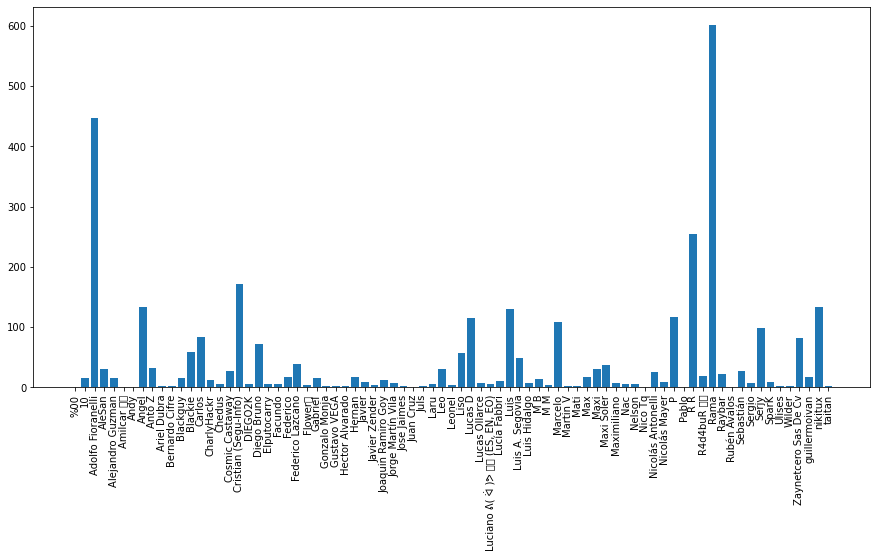

In [3]:
plt.figure(figsize = (15,7))
plt.bar(df2['from'],df2['messages'])
plt.xticks(rotation=90)
plt.show()

### Promedio de palabras utilizadas por mensaje por cada usuario

In [4]:
#Crear una columna nueve en el dataframe contando la cantidad de palabras por mensaje
df['total_words'] = [len(str(x).split(" ")) for x in df['text']]
groups = ['from','total_words']
agregations = {
    'total_words':["min","max","mean"]
}
df.groupby(groups,as_index=False).agg(agregations)
#Agrupar por usuario y cantidad de palabras
df['total_words'] = [len(str(x).split(" ")) for x in df['text']]
df2 = df.groupby(['from'])[['total_words']].mean()

,total_words
from,
%00,9.000000
10,8.666667
Adolfo Fioranelli,17.199552
AleSan,3.633333
Alejandro Guzman,6.250000
...,...
Wilder,1.333333
Zaynetcero Sas De Cv,8.182927
guillermoivan,11.888889


/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.p

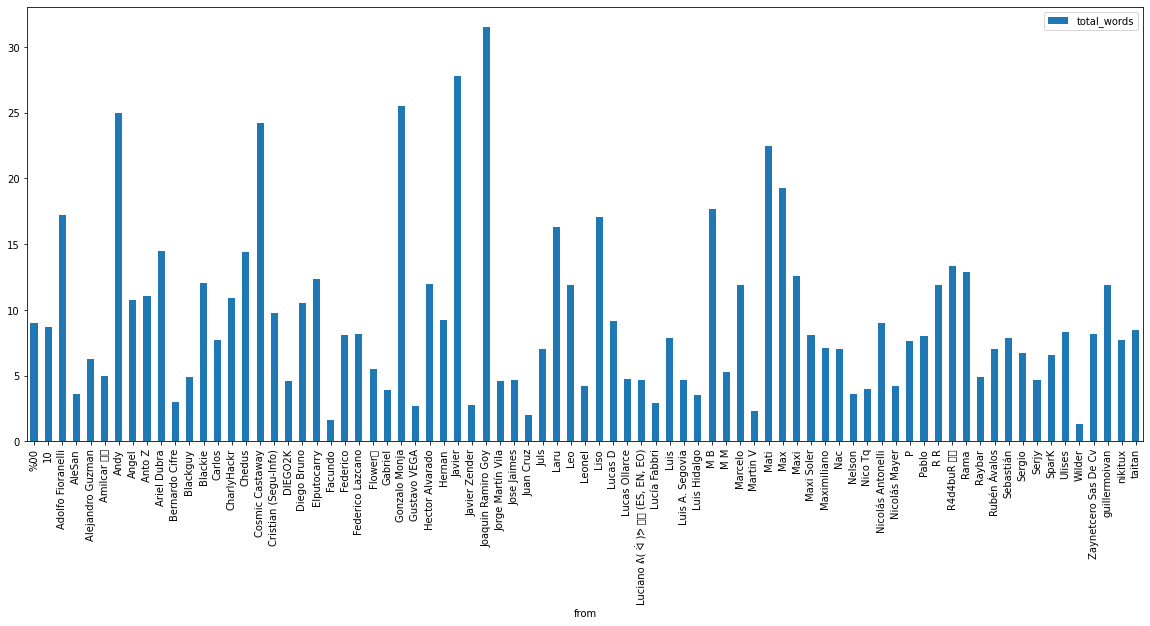

In [5]:
df2.plot(kind='bar', figsize=(20,8))
df2

### Porcentaje de mensajes enviados por cada usuario

In [15]:
df2 = df.groupby('from')['type'].count()/df['type'].count()*100
df2

from
%00                      0.028027
10                       0.420404
Adolfo Fioranelli       12.500000
AleSan                   0.840807
Alejandro Guzman         0.448430
                          ...    
Wilder                   0.084081
Zaynetcero Sas De Cv     2.298206
guillermoivan            0.504484
nikitux                  3.755605
taitan                   0.056054
Name: type, Length: 79, dtype: float64

<AxesSubplot:xlabel='from'>

/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/ollyxs/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.p

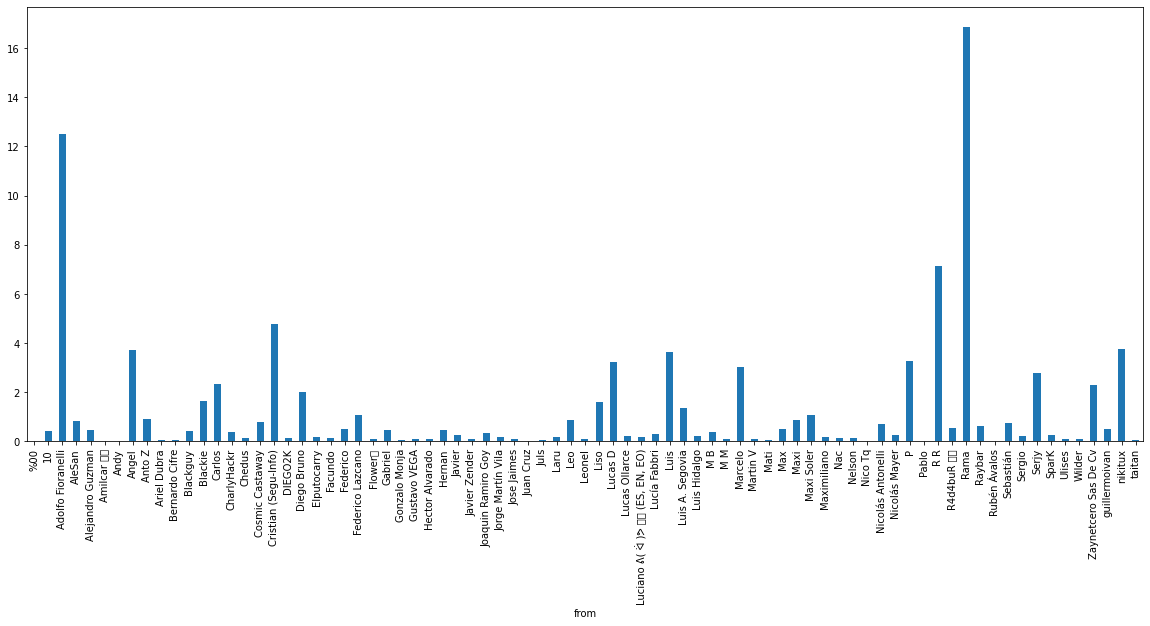

In [16]:
df2.plot(kind='bar', figsize=(20,8))

### Frecuencia de envío de mensaje dependiendo la hora del día

hour_only
0      40
1      23
2      20
3       7
4       4
5       3
6       4
7      14
8      84
9     246
10    176
11    218
12    283
13    289
14    183
15    227
16    207
17    222
18    254
19    198
20    222
21    266
22    188
23    190
Name: type, dtype: int64

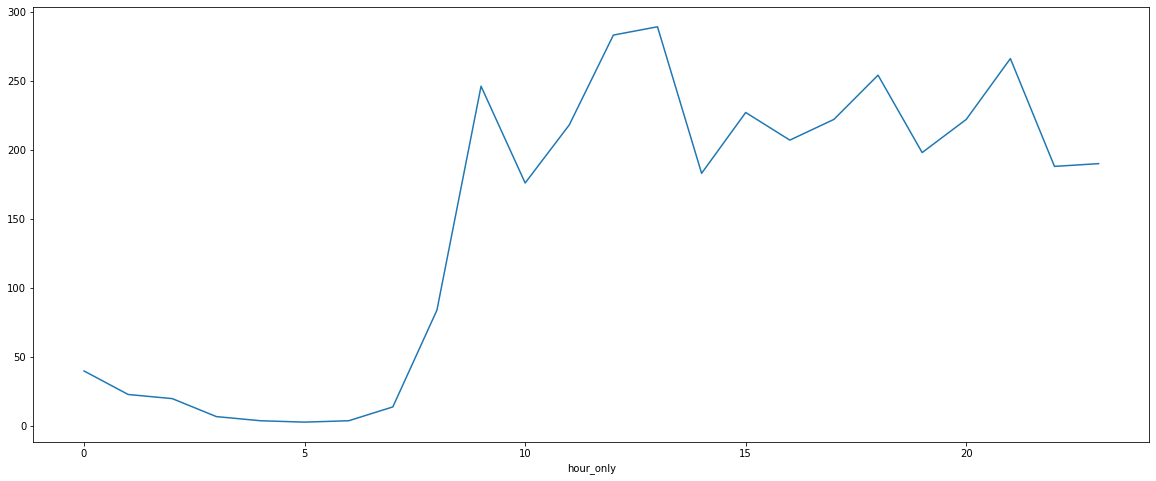

In [23]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%S')
df['hour_only'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%S').dt.hour
df2 = df.groupby('hour_only')['type'].count()
df2.plot(figsize=(20,8))
df2

### Frecuencia de envío de mensaje dependiendo del día de la semana

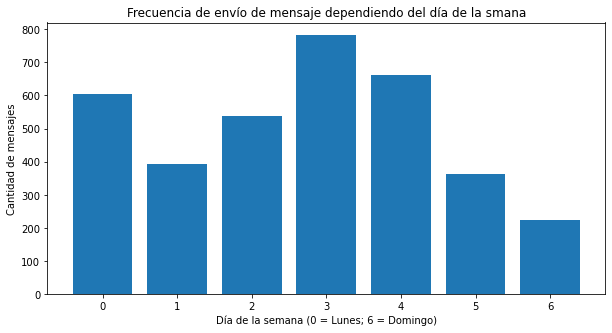

,frequency
date,
0,603
1,394
2,539
3,781
4,663
5,364
6,224


In [8]:
groups = [df['date'].dt.weekday]
df_aux = df.groupby(groups).agg(frequency = ('id','count'))
df_aux
#Gráfico
plt.figure(figsize=(10,5))
plt.xlabel("Día de la semana (0 = Lunes; 6 = Domingo)")
plt.ylabel("Cantidad de mensajes")
plt.title("Frecuencia de envío de mensaje dependiendo del día de la smana")
plt.bar(df_aux.index,df_aux['frequency'])
plt.show()
df_aux

### Hora del día preferida por cada usuario para enviar mensajes

In [26]:
groups = ["from"]
df2 = df.groupby(groups).agg(favourite_hour = ("date", lambda x: x.dt.hour.mode()))
df2

,favourite_hour
from,
%00,21
10,15
Adolfo Fioranelli,9
AleSan,12
Alejandro Guzman,13
...,...
Wilder,"[11, 19, 22]"
Zaynetcero Sas De Cv,14
guillermoivan,15


### Día de la semana preferida por cada usuario para enviar mensajes

In [10]:
groups = ["from"]
df.groupby(groups).agg(favourite_day = ("date", lambda x: x.dt.weekday.mode()))

,favourite_day
from,
%00,2
10,"[0, 4]"
Adolfo Fioranelli,3
AleSan,2
Alejandro Guzman,0
...,...
Wilder,"[0, 2, 5]"
Zaynetcero Sas De Cv,2
guillermoivan,3


### Cantidad promedio de mensajes enviados por hora para cada usuario

In [38]:
number_of_days = (df['date'].max() - df['date'].min()).days
print(number_of_days)
groups = ['from']
agregations = {
    'text': lambda x: (x.count()/24)/number_of_days
    
}
df.groupby(groups).agg(agregations)

577


,text
from,
%00,0.000072
10,0.001083
Adolfo Fioranelli,0.032207
AleSan,0.002166
Alejandro Guzman,0.001155
...,...
Wilder,0.000217
Zaynetcero Sas De Cv,0.005921
guillermoivan,0.001300


### Cantidad de usuarios promedio que envían mensaje por cada día de la semana

In [12]:
number_of_weeks = ((df['date'].max() - df['date'].min())).days/7
print(number_of_weeks)
groups = ['from', df['date'].dt.weekday]
print(df['from'].unique())
df_aux = df.groupby( groups).agg(total_messages=('from', lambda x: x.count()/number_of_weeks))

df_aux.groupby(['date']).agg(total_users = ('total_messages', lambda x: x.sum()/len(df_aux.index.unique())))

82.42857142857143
[nan 'Rama' 'DIEGO2K' 'Rubén Ávalos' 'M M' 'Martin V' 'Federico Lazcano'
 'Liso' 'R R' 'Ulises' 'Javier Zender' 'Marcelo' 'Diego Bruno'
 'Jorge Martín Vila' 'Ariel Dubra' 'Blackguy' 'Nac' 'Adolfo Fioranelli'
 'Gustavo VEGA' 'Carlos' 'Chedus' 'SparK' 'Gabriel' 'Maxi Soler' 'Nelson'
 'Jose Jaimes' None '10' 'Angel' 'nikitux' 'Serjy' 'Elputocarry' 'Javier'
 'Maximiliano' 'Federico' 'Luis' 'Luciano ᕕ( ᐛ )ᕗ 🇦🇷 (ES, EN, EO)'
 'AleSan' 'Nico Tq' 'Nicolás Mayer' 'Blackie' 'Leonel' 'Lucía Fabbri'
 'R4d4buR 🇦🇷' 'taitan' 'Lucas D' 'Amilcar 🇦🇷' 'Nicolás Antonelli'
 'Juan Cruz' 'Wilder' 'Facundo' 'Bernardo Cifre' 'Max' 'Sebastián'
 'Sergio' 'CharlyHackr' 'Zaynetcero Sas De Cv' 'Flower🌸' '%00' 'Mati'
 'Pablo' 'guillermoivan' 'Anto Z' 'Cosmic Castaway' 'Luis A. Segovia'
 'Hector Alvarado' 'Juls' 'Maxi' 'Laru' 'Raybar' 'Cristian (Segu-Info)'
 'Hernan' 'Leo' 'Alejandro Guzman' 'Luis Hidalgo' 'Joaquin Ramiro Goy' 'P'
 'Lucas Ollarce' 'M B' 'Andy' 'Gonzalo Monja']


,total_users
date,
0,0.022409
1,0.014836
2,0.019782
3,0.029518
4,0.023568
5,0.012827
6,0.007573


### Cantidad de mensajes envíados por mes

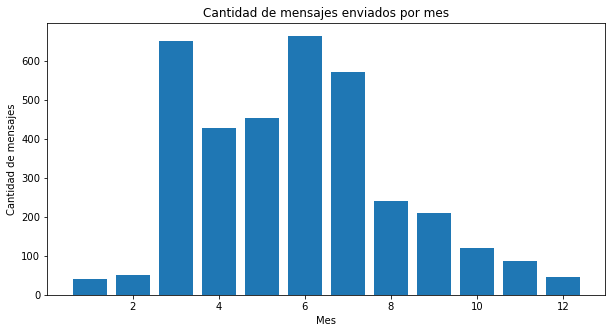

In [13]:
groups = [df['date'].dt.month]
df_aux = df.groupby(groups).agg(total_messages = ('id',lambda x: x.count()))

plt.figure(figsize=(10,5))
plt.xlabel("Mes")
plt.ylabel("Cantidad de mensajes")
plt.title("Cantidad de mensajes enviados por mes")
plt.bar(df_aux.index,df_aux['total_messages'])
plt.show()


### Cantidad mínima, máxima y promedio de palabras por mensaje

<ipython-input-14-a033ef5c26d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_words'][i] = len(df['words'][i])


,minimo,maximo,promedio
type,,,
message,1,399,10.691704


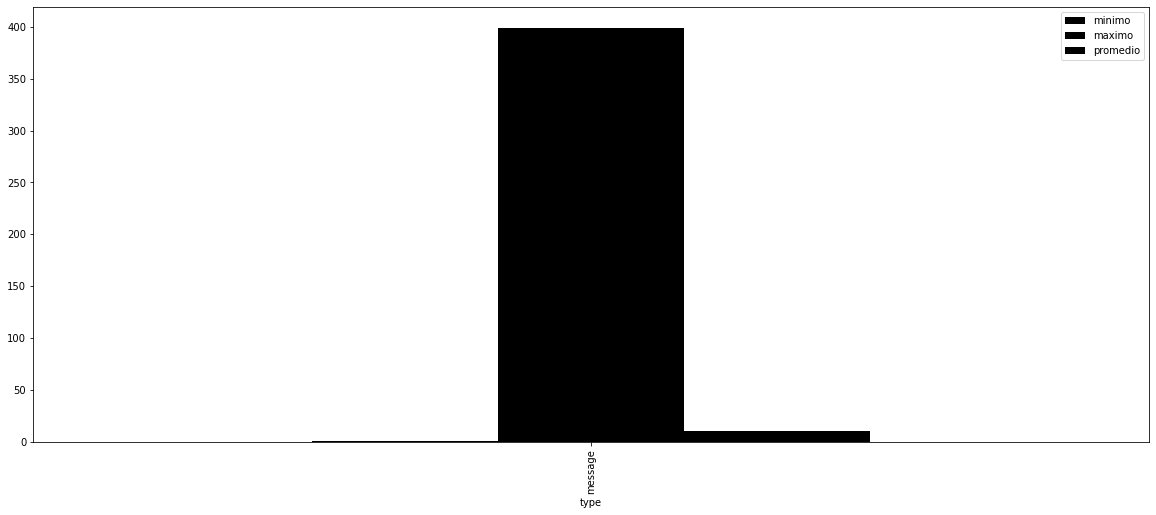

In [14]:
df['words'] = [str(x).split(" ") for x in df['text']]
df['total_words'] = ''
for i in range(len(df)):
    df['total_words'][i] = len(df['words'][i])
df2 = df.groupby(['type']).agg(minimo = ('total_words', "min"), maximo = ('total_words', "max"), promedio = ("total_words", lambda x: (x.sum())/len(df['total_words']))) 
df2 = df2.drop('service')
df2.plot(kind='bar', figsize=(20,8), color="black")
df2